In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
# Carga de datos X e y
!gdown 1XumfqAFi7CNXepC8mrehx5WYJez0LzaJ
!gdown 1HLC4d4KR_b-UxSkXeRzsMBGGgtefnZvh

Downloading...
From: https://drive.google.com/uc?id=1XumfqAFi7CNXepC8mrehx5WYJez0LzaJ
To: /content/X.npy
100% 108M/108M [00:01<00:00, 92.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HLC4d4KR_b-UxSkXeRzsMBGGgtefnZvh
To: /content/y.npy
100% 16.3k/16.3k [00:00<00:00, 53.2MB/s]


In [ ]:
# Procesamiento de datos X e y
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

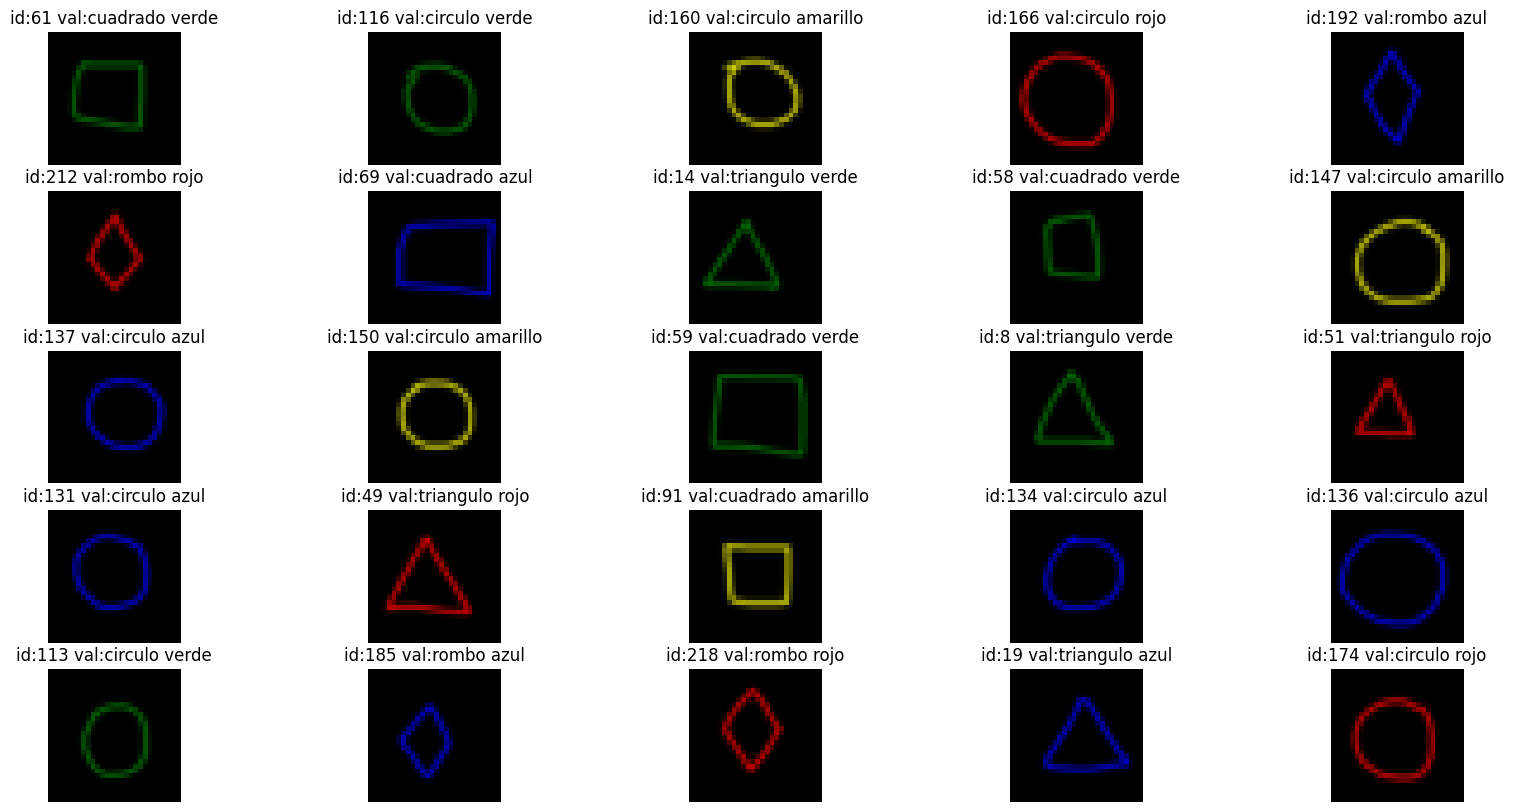

In [ ]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(X[idx])
    plt.axis('off')
plt.show()

In [ ]:
# Entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 4:
    X_train = X_train[..., None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(179, 28, 28, 3) (45, 28, 28, 3)
(179, 28, 28, 3, 1) (45, 28, 28, 3, 1)


In [ ]:
bs = 16
lr = 0.0001
class_mapping = {'triangulo verde': 0, 'triangulo azul': 1, 'triangulo amarillo': 2,'triangulo rojo': 3,
                 'cuadrado verde': 4, 'cuadrado azul': 5, 'cuadrado amarillo': 6, 'cuadrado rojo': 7,
                 'circulo verde': 8, 'circulo azul': 9, 'circulo amarillo': 10, 'circulo rojo': 11,
                 'rombo verde': 12, 'rombo azul': 13, 'rombo amarillo': 14, 'rombo rojo': 15}
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(*size,3)),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(16, activation='softmax')])

In [ ]:
optimizer1 = SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [ ]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=2000, validation_data=(X_test, y_test))
model.save('figurIA.h5')

Epoch 1/2000
12/12 [==============================] - 0s 19ms/step - loss: 0.2193 - accuracy: 0.9777 - val_loss: 0.3987 - val_accuracy: 0.8444
Epoch 2/2000
12/12 [==============================] - 0s 17ms/step - loss: 0.2193 - accuracy: 0.9721 - val_loss: 0.3987 - val_accuracy: 0.8667
Epoch 3/2000
12/12 [==============================] - 0s 18ms/step - loss: 0.2192 - accuracy: 0.9721 - val_loss: 0.3994 - val_accuracy: 0.8667
Epoch 4/2000
12/12 [==============================] - 0s 19ms/step - loss: 0.2192 - accuracy: 0.9721 - val_loss: 0.3996 - val_accuracy: 0.8444
Epoch 5/2000
12/12 [==============================] - 0s 17ms/step - loss: 0.2192 - accuracy: 0.9721 - val_loss: 0.3992 - val_accuracy: 0.8667
Epoch 6/2000
12/12 [==============================] - 0s 17ms/step - loss: 0.2193 - accuracy: 0.9665 - val_loss: 0.3999 - val_accuracy: 0.8667
Epoch 7/2000
12/12 [==============================] - 0s 17ms/step - loss: 0.2188 - accuracy: 0.9721 - val_loss: 0.3997 - val_accuracy: 0.8444

In [ ]:
shapes = {0: 'triangulo verde', 1: 'triangulo azul', 2: 'triangulo amarillo', 3: 'triangulo rojo',
          4: 'cuadrado verde', 5: 'cuadrado azul', 6: 'cuadrado amarillo', 7: 'cuadrado rojo',
          8: 'circulo verde', 9: 'circulo azul', 10: 'circulo amarillo', 11: 'circulo rojo',
          12: 'rombo verde', 13: 'rombo azul', 14: 'rombo amarillo', 15: 'rombo rojo'}

In [ ]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
valor_simbolo = shapes.get(label, 'Desconocida')
print(shapes.get(label))

cuadrado amarillo


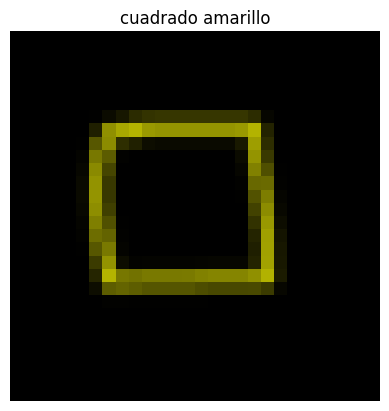

In [ ]:
plt.title('{}'.format(valor_simbolo))
plt.axis('off')
plt.imshow(im[:,:,:,0])
plt.show()

In [ ]:
salida = model.predict(im[None,:,:,:])[0]

1/1 [==============================] - 0s 33ms/step


In [ ]:
for x in range(len(salida)):
  print("{}: {:.2f}%".format(shapes[x], salida[x] * 100))

triangulo verde: 0.00%
triangulo azul: 0.00%
triangulo amarillo: 0.63%
triangulo rojo: 0.01%
cuadrado verde: 0.00%
cuadrado azul: 0.00%
cuadrado amarillo: 53.01%
cuadrado rojo: 0.07%
circulo verde: 0.00%
circulo azul: 0.00%
circulo amarillo: 45.85%
circulo rojo: 0.01%
rombo verde: 0.00%
rombo azul: 0.00%
rombo amarillo: 0.44%
rombo rojo: 0.00%


In [ ]:
import matplotlib.colors as mcolors

s = []
c = []
for i in range(len(shapes)):
  s.append(shapes[i].split(' ')[0][:2])
  c.append(shapes[i].split(' ')[1])

color_toRGBA = {
    'verde': mcolors.to_rgba("green"),
    'azul': mcolors.to_rgba("blue"),
    'amarillo': mcolors.to_rgba("yellow"),
    'rojo': mcolors.to_rgba("red")
}

colores = [color_toRGBA[color] for color in c]


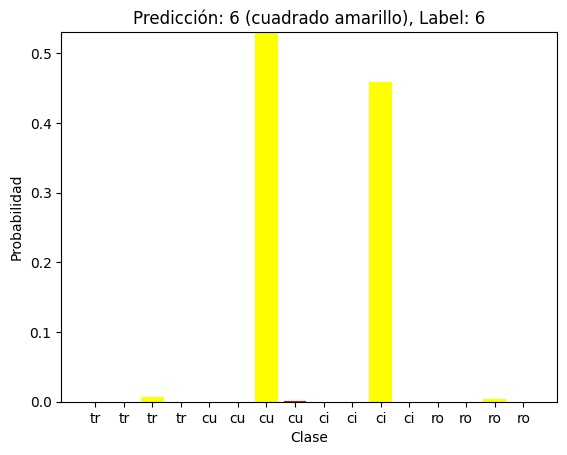

In [ ]:
plt.figure()
plt.title("Predicción: {} ({}), Label: {}".format(salida.argmax(), valor_simbolo, label))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")

plt.xticks(np.arange(len(salida)), s)
plt.bar(np.arange(len(salida)), salida, color=colores)

plt.ylim([0, max(salida)])
plt.show()